<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Informe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación
Muestre los 6 espectros simultáneamente

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from io import StringIO
from scipy.signal import find_peaks

/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a fut

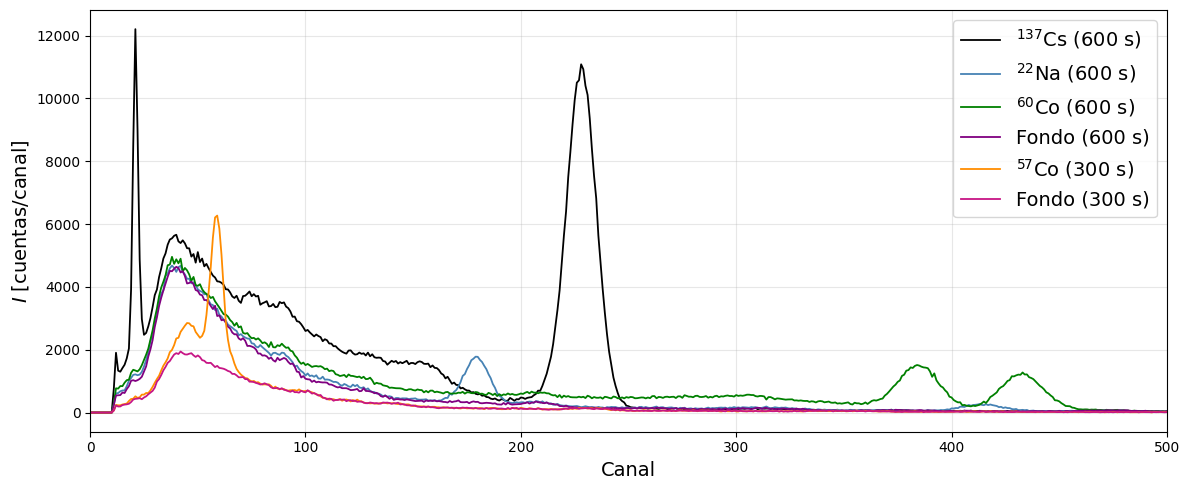

In [ ]:
# Lista de archivos .dat
archivos = [
    "NaI_137Cs_600s.dat",
    "NaI_22Na_600s.dat",
    "NaI_60Co_600s.dat",
    "NaI_Fondo_600s.dat",
    "NaI_57Co_300s.dat",
    "NaI_Fondo_300s.dat"
]

colores = ['black', 'steelblue', 'green', 'purple', 'darkorange', 'mediumvioletred']
etiquetas = ['$^{137}$Cs (600 s)', '$^{22}$Na (600 s)', '$^{60}$Co (600 s)', 'Fondo (600 s)', '$^{57}$Co (300 s)', 'Fondo (300 s)']

plt.figure(figsize=(12, 5))

def leer_datos(ruta):
    try:
        df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
        cols = df.columns[:2]
        df = df.rename(columns={cols[0]: 'canal', cols[1]: 'cuentas'})
        df['canal'] = pd.to_numeric(df['canal'], errors='coerce')
        df['cuentas'] = pd.to_numeric(df['cuentas'], errors='coerce')
        df = df.dropna(subset=['canal', 'cuentas']).reset_index(drop=True)
        return df[['canal', 'cuentas']]
    except Exception:                                                           # en caso de no tener los títulos
        df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=None)
        df = df.iloc[:, :2]                                                     # tomo solo las dos primeras columnas
        df.columns = ['canal', 'cuentas']
        df['canal'] = pd.to_numeric(df['canal'], errors='coerce')
        df['cuentas'] = pd.to_numeric(df['cuentas'], errors='coerce')
        df = df.dropna(subset=['canal', 'cuentas']).reset_index(drop=True)
        return df[['canal', 'cuentas']]

for archivo, color, etiqueta in zip(archivos, colores, etiquetas):
    if not os.path.exists(archivo):
        print(f"No se encontró el archivo {archivo}, se saltará.")
        continue
    data = leer_datos(archivo)
    x = data['canal'].values
    y = data['cuentas'].values
    plt.plot(x, y, lw=1.3, color=color, label=etiqueta)

plt.xlabel("Canal", fontsize=14)
plt.xlim(0, 500)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


Reste el fondo correspondiente a cada espectro

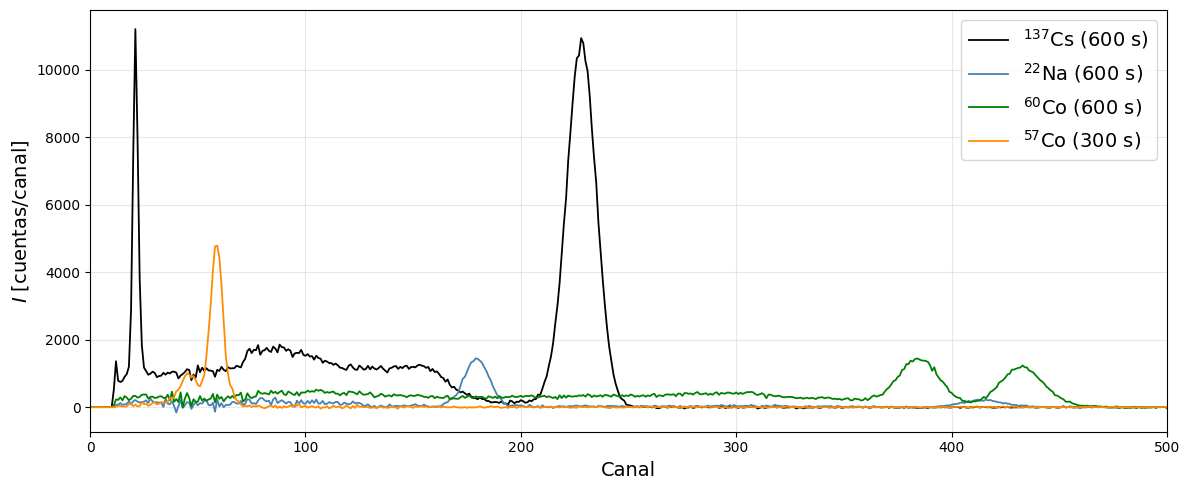

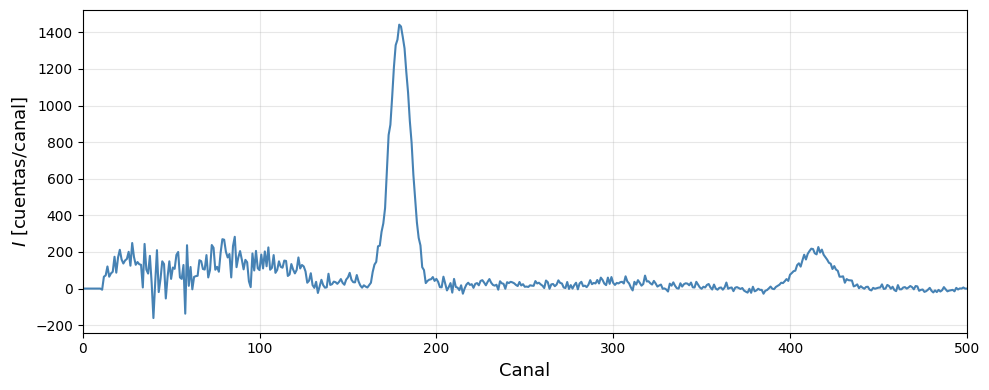

In [ ]:
archivos = [
    "NaI_137Cs_600s.dat",
    "NaI_22Na_600s.dat",
    "NaI_60Co_600s.dat",
    "NaI_57Co_300s.dat",
    "NaI_Fondo_600s.dat",
    "NaI_Fondo_300s.dat"
]

colores = ['black', 'steelblue', 'green', 'darkorange', 'gray', 'gray']
etiquetas = ['$^{137}$Cs (600 s)', '$^{22}$Na (600 s)', '$^{60}$Co (600 s)', '$^{57}$Co (300 s)', 'Fondo (600 s)', 'Fondo (300 s)']

def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

# los fondos
fondo_600 = leer_dat("NaI_Fondo_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_300s.dat")

plt.figure(figsize=(12, 5))


for archivo, color, etiqueta in zip(archivos, colores, etiquetas):
    if "Fondo" in archivo:                                                      # ya no grafico los fondos. Además, distingo espectros de fondos
        continue

    data = leer_dat(archivo)
    x = data['canal'].values
    y = data['cuentas'].astype(float).values


    if "600s" in archivo:                                                       # si el espectro es de 600 segundos
        y_fondo = np.interp(x, fondo_600['canal'], fondo_600['cuentas'])
        y -= y_fondo                                                            # le resto el respectivo fondo de 600 segundos
    elif "300s" in archivo:                                                     # si el espectro es de 300 segundos
        y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
        y -= y_fondo                                                            # le resto el respectivo fondo de 300 segundos

    plt.plot(x, y, lw=1.3, color=color, label=etiqueta)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


data_na22 = leer_dat("NaI_22Na_600s.dat")                                       # como la intensidad es tan baja para el sodio, conviene más mostrarla por separado
x = data_na22['canal'].values
y = data_na22['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_600['canal'], fondo_600['cuentas'])
y -= y_fondo

plt.figure(figsize=(10, 4))
plt.plot(x, y, color='steelblue', lw=1.5)
plt.xlabel("Canal", fontsize=13)
plt.ylabel("$I$ [cuentas/canal]", fontsize=13)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Haga una gráfica que muestre simultáneamente el espectro del 57Co, el fondo, y la resta obtenida

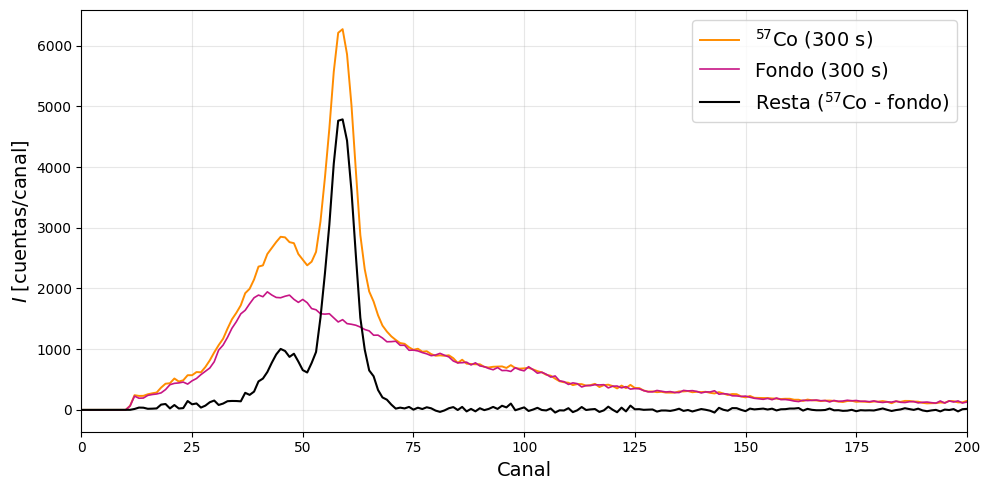

In [ ]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_57Co_300s.dat")
fondo_300 = leer_dat("NaI_Fondo_300s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
y_resta = y_co57 - y_fondo


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{57}$Co (300 s)", color='darkorange', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (300 s)", color='mediumvioletred', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{57}$Co - fondo)", color='black', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 200)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Haga una gráfica "resta" para un espectro con tiempo de adquisición de 600 segundos.

Elijo el Cesio-137 (pero podría hacerlo para todos. De hecho, debo hacerlo antes de los ajustes gaussianos de "preparación"),

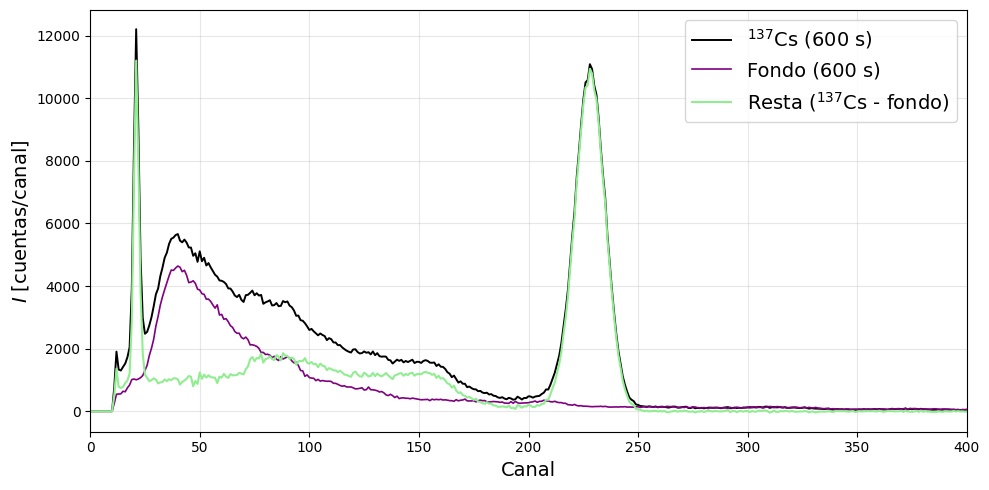

In [ ]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_137Cs_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_600s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
y_resta = y_co57 - y_fondo


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{137}$Cs (600 s)", color='black', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (600 s)", color='purple', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{137}$Cs - fondo)", color='lightgreen', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 400)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Resta del fondo para Sodio-22

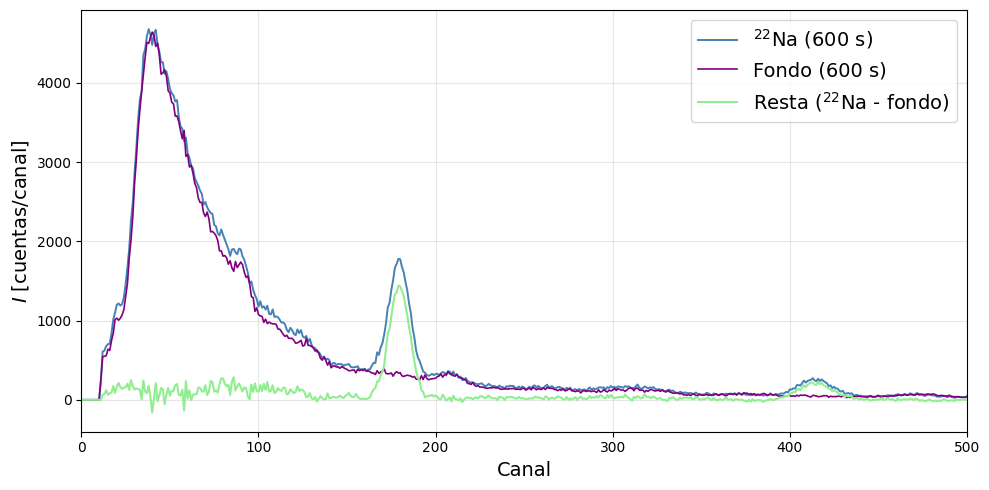

In [ ]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_22Na_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_600s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
y_resta = y_co57 - y_fondo


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{22}$Na (600 s)", color='steelblue', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (600 s)", color='purple', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{22}$Na - fondo)", color='lightgreen', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Resta del fondo para Cobalto-60

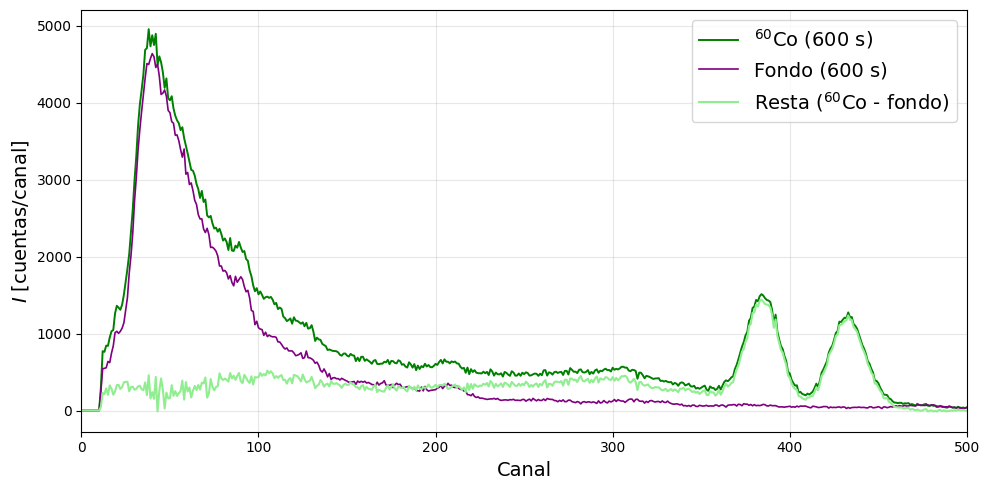

In [ ]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_60Co_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_600s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
# y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
# y_resta = y_co57 - y_fondo
y_resta = y_co57 - fondo_300['cuentas'].astype(float).values


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{60}$Co (600 s)", color='green', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (600 s)", color='purple', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{60}$Co - fondo)", color='lightgreen', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Esta resta de fondos nos permite elegir los picos a los que les debemos hacer el ajuste gaussiano en el análisis.

#Análisis

1. Determinación de cantidades espectroscópicas

*   Ajuste gaussianas a cada fotopico (incluya rayos X), y determine $\mu$, $\sigma$, FWHM, e $I$.
*   Para picos aislados: muestre simultáneamente el espectro y el ajuste
*   Ajuste los picos del Cobalto-60 simultáneamente (use el mismo fondo y suma de gaussianas)




**Ajuste Cesio-137**


=== Parámetros primer pico (doble gaussiana) ===
μ₁       = 20.83(13)
σ₁       = 0.72(20)
FWHM₁    = 1.69(47)
A₁       = 2178(14)
Int₁     = 3931(28)
μ₂       = 21.115(38)
σ₂       = 1.254(60)
FWHM₂    = 2.94(14)
A₂       = 8061(15)
Int₂     = 25329(48)
I = 29260(56)

=== Parámetros segundo pico (simple gaussiana) ===
μ        = 228.098(23)
σ        = 6.824(26)
FWHM     = 16.007(61)
A        = 10602(31)
Int      = 181339(87)


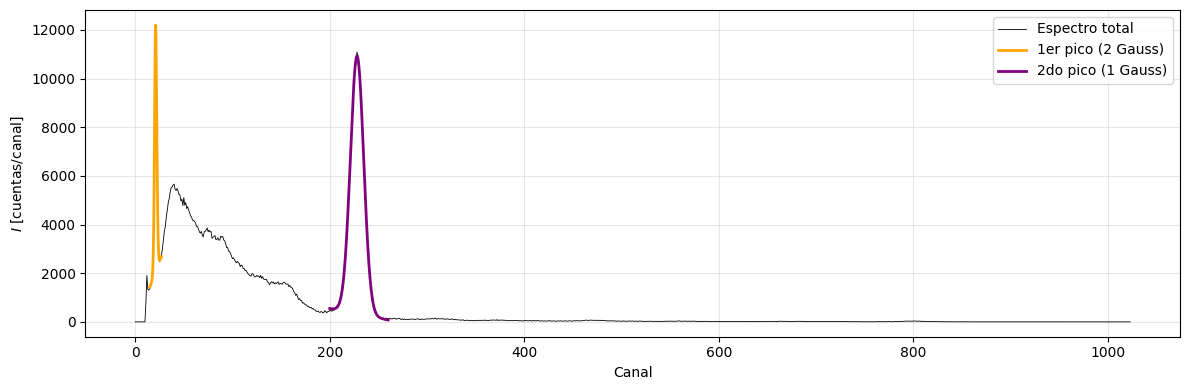

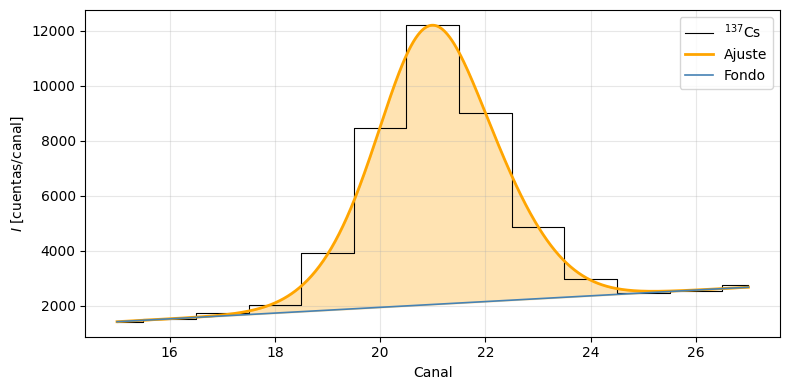

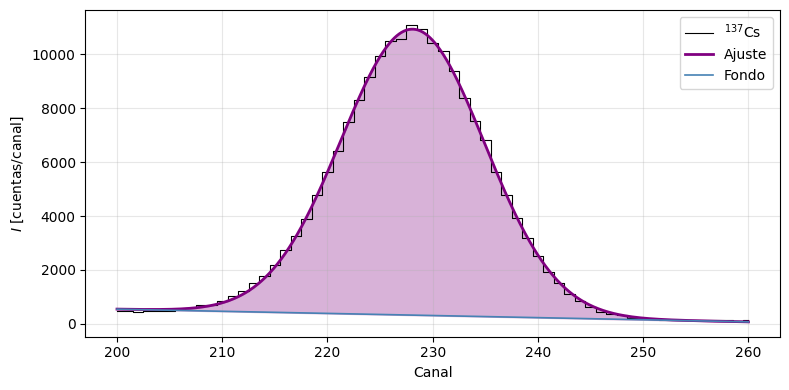

In [144]:
def leer_dat(archivo):                                                                  # lectura de datos
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gauss_bg(x, mu, sigma, A, a0, a1):                                                   # ajuste gaussiano con fondo lineal
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + a0 + a1 * x

def double_gauss_bg(x, mu1, sigma1, A1, mu2, sigma2, A2, a0, a1):                        # ajuste de dos gaussianas con fondo lineal
    return (A1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2) +
            A2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2) +
            a0 + a1 * x)


def fwhm(sigma): return 2.3458 * sigma                                                             # FWHM
def dfwhm(dsigma): return 2.3458 * dsigma                                                          # incertidumbre del FWHM
def intensidad(A, sigma): return A * sigma * np.sqrt(2 * np.pi)                                   # I
def dintensidad(A, sigma, dA, dsigma):                                                            # incertidumbre de I
    return np.sqrt((sigma * np.sqrt(2*np.pi) * dA)**2 + (A * np.sqrt(2*np.pi) * dsigma)**2)



def format_unc(value, error):                                                                     # incertidumbre en forma compacta
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_137Cs_600s.dat"
data = leer_dat(archivo)
x = data['canal'].values
y = data['cuentas'].values

# Primer pico                                                                   # estimación "a ojo" del primer pico
x_min1, x_max1 = 15, 27
mask1 = (x >= x_min1) & (x <= x_max1)
x_region1, y_region1 = x[mask1], y[mask1]

# estimaciones iniciales que luego se van a ajustar
mu1_guess = x_region1[np.argmax(y_region1)]
A1_guess = y_region1.max()
sigma1_guess = 2
a0_guess = np.median(y_region1)
a1_guess = 0.0

# estimaciones doble gaussiana
mu1a_guess = mu1_guess - 0.8
mu1b_guess = mu1_guess + 0.8
sigma1a_guess = 1.8
sigma1b_guess = 1.8
A1a_guess = A1_guess * 0.9
A1b_guess = A1_guess * 0.1

p0_1double = [
    mu1a_guess, sigma1a_guess, A1a_guess,
    mu1b_guess, sigma1b_guess, A1b_guess,
    a0_guess, a1_guess
]

lower = [mu1_guess-5, 0.5, 0.0, mu1_guess-5, 0.5, 0.0, a0_guess - A1_guess, -abs(A1_guess)/50]
upper = [mu1_guess+5, 10.0, A1_guess*2, mu1_guess+5, 10.0, A1_guess*2, a0_guess + A1_guess, abs(A1_guess)/50]

y_err = np.sqrt(np.maximum(y_region1, 1))
popt1_double, pcov1_double = curve_fit(
    double_gauss_bg, x_region1, y_region1, p0=p0_1double,
    sigma=y_err, bounds=(lower, upper), maxfev=20000
)
perr1_double = np.sqrt(np.diag(pcov1_double))

# Segundo pico
x_min2, x_max2 = 200, 260
mask2 = (x >= x_min2) & (x <= x_max2)
x_region2, y_region2 = x[mask2], y[mask2]

mu2_guess = x_region2[np.argmax(y_region2)]
A2_guess = y_region2.max()
sigma2_guess = 4.0
a0_guess2 = np.median(y_region1)
a1_guess2 = 0.0
p0_2 = [mu2_guess, sigma2_guess, A2_guess, a0_guess2, a1_guess2]

popt2, pcov2 = curve_fit(gauss_bg, x_region2, y_region2, p0=p0_2, maxfev=10000)
perr2 = np.sqrt(np.diag(pcov2))

# Tablas
μ1, σ1, A1, μ2, σ2, A2, a0, a1 = popt1_double
dμ1, dσ1, dA1, dμ2, dσ2, dA2, da0, da1 = perr1_double

# Compacta
print("\n=== Parámetros primer pico (doble gaussiana) ===")
labels1 = ["μ₁", "σ₁", "FWHM₁", "A₁", "Int₁", "μ₂", "σ₂", "FWHM₂", "A₂", "Int₂"]
values1 = [μ1, σ1, fwhm(σ1), A1, intensidad(A1, σ1), μ2, σ2, fwhm(σ2), A2, intensidad(A2, σ2)]
errors1 = [dμ1, dσ1, dfwhm(dσ1), dA1, dintensidad(A1, σ1, dA1, dσ1),
           dμ2, dσ2, dfwhm(dσ2), dA2, dintensidad(A2, σ2, dA2, dσ2)]

for lbl, val, err in zip(labels1, values1, errors1):
    print(f"{lbl:8s} = {format_unc(val, err)}")

''' Intensidad total'''

# valores resultantes del ajuste
I1, dI1 = 3931, 28
I2, dI2 = 25329, 48

I = I1 + I2

# propagación de incertidumbres (variables independientes)
dI = np.sqrt(dI1**2 + dI2**2)

def compact(value, error):
    err = int(round(error))
    return f"{int(round(value))}({err})"

print("I =", compact(I, dI))

print("\n=== Parámetros segundo pico (simple gaussiana) ===")
μ, σ, A, a0, a1 = popt2
dμ, dσ, dA, da0, da1 = perr2
labels2 = ["μ", "σ", "FWHM", "A", "Int"]
values2 = [μ, σ, fwhm(σ), A, intensidad(A, σ)]
errors2 = [dμ, dσ, dfwhm(dσ), dA, dintensidad(A, σ, dA, dσ)]


for lbl, val, err in zip(labels2, values2, errors2):
    print(f"{lbl:8s} = {format_unc(val, err)}")



# Gráficas
xf1 = np.linspace(x_region1.min(), x_region1.max(), 800)
xf2 = np.linspace(x_region2.min(), x_region2.max(), 800)
fit1_double = double_gauss_bg(xf1, *popt1_double)
fit2 = gauss_bg(xf2, *popt2)
bg1 = popt1_double[6] + popt1_double[7] * xf1
bg2 = popt2[3] + popt2[4] * xf2

plt.figure(figsize=(12, 4))
plt.plot(x, y, color='black', lw=0.6, label='Espectro total')
plt.plot(xf1, fit1_double, color='orange', lw=2, label='1er pico (2 Gauss)')
plt.plot(xf2, fit2, color='purple', lw=2, label='2do pico (1 Gauss)')
plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# Para ver mejor cada pico por separado
for (xr, yr, xf, fit, bg, color, title) in [
    (x_region1, y_region1, xf1, fit1_double, bg1, "orange", "Primer pico ($^{137}$Cs)"),
    (x_region2, y_region2, xf2, fit2, bg2, "purple", "Segundo pico ($^{137}$Cs)")
]:
    plt.figure(figsize=(8, 4))
    plt.step(xr, yr, where='mid', color='black', lw=0.8, label='$^{137}$Cs')
    plt.plot(xf, fit, color=color, lw=2, label='Ajuste')
    plt.plot(xf, bg, color='steelblue', lw=1.2, label='Fondo')
    plt.fill_between(xf, bg, fit, where=(fit > bg), color=color, alpha=0.3)
    plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]"); plt.legend(); plt.grid(alpha=0.3)
    plt.tight_layout(); plt.show()


Ajuste Sodio-22


=== Parámetros primer pico (simple gaussiana) ===
μ₁       = 179.354(62)
σ₁       = 5.697(67)
FWHM₁    = 13.36(16)
A₁       = 1423(15)
Int₁     = 20319(32)

=== Parámetros segundo pico (simple gaussiana) ===
μ        = 414.17(19)
σ        = 9.33(24)
FWHM     = 21.89(55)
A        = 206.1(37)
Int      = 4823(15)


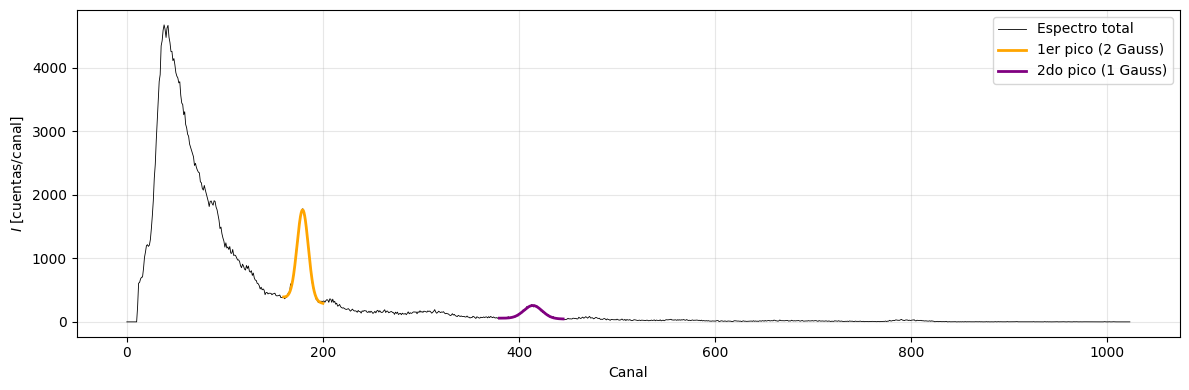

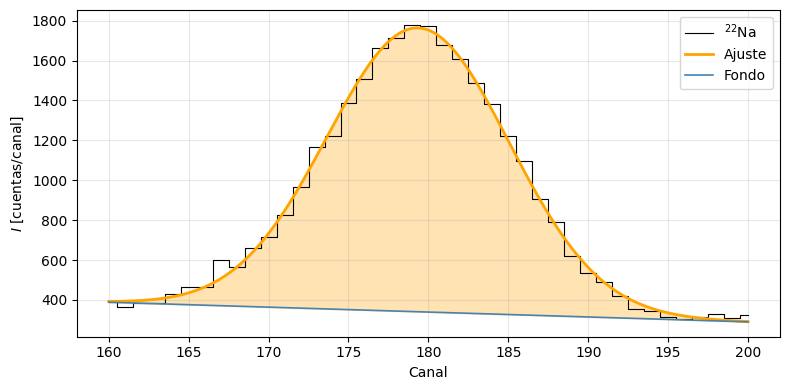

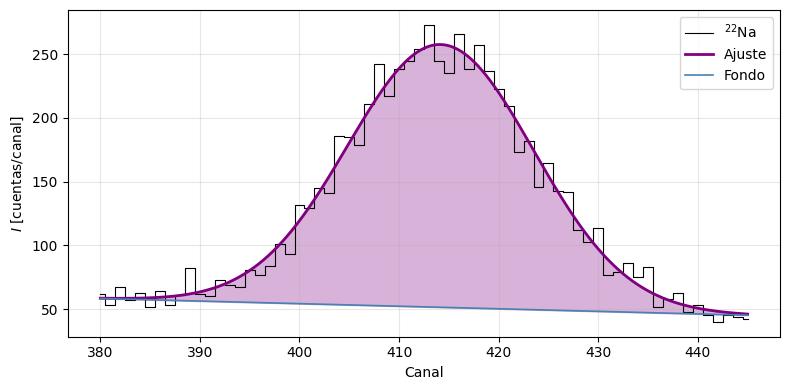

In [170]:
def leer_dat(archivo):                                                                  # lectura de datos
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gauss_bg(x, mu, sigma, A, a0, a1):                                                   # ajuste gaussiano con fondo lineal
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + a0 + a1 * x


def fwhm(sigma): return 2.3458 * sigma                                                             # FWHM
def dfwhm(dsigma): return 2.3458 * dsigma                                                          # incertidumbre del FWHM
def intensidad(A, sigma): return A * sigma * np.sqrt(2 * np.pi)                                    # I
def dintensidad(A, sigma, dA, dsigma):                                                             # incertidumbre de I
    return np.sqrt((sigma * np.sqrt(2*np.pi) * dA)**2 + (A * np.sqrt(2*np.pi) * dsigma)**2)



def format_unc(value, error):                                                                     # incertidumbre en forma compacta
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_22Na_600s.dat"
data = leer_dat(archivo)
x = data['canal'].values
y = data['cuentas'].values

# Primer pico                                                                   # estimación "a ojo" del primer pico
x_min1, x_max1 = 160, 200
mask1 = (x >= x_min1) & (x <= x_max1)
x_region1, y_region1 = x[mask1], y[mask1]

# estimaciones iniciales que luego se van a ajustar
mu1_guess = x_region1[np.argmax(y_region1)]
A1_guess = y_region1.max()
sigma1_guess = 4
a0_guess = np.median(y_region1)
a1_guess = 0.0

p0_1 = [mu1_guess, sigma1_guess, A1_guess, a0_guess, a1_guess]

y_err1 = np.sqrt(np.maximum(y_region1, 1))
popt1, pcov1 = curve_fit(gauss_bg, x_region1, y_region1, p0=p0_1,
                         sigma=y_err1, absolute_sigma=True, maxfev=2000)
perr1 = np.sqrt(np.diag(pcov1))

# Segundo pico
x_min2, x_max2 = 380, 445
mask2 = (x >= x_min2) & (x <= x_max2)
x_region2, y_region2 = x[mask2], y[mask2]

mu2_guess = x_region2[np.argmax(y_region2)]
A2_guess = y_region2.max()
sigma2_guess = 4.0
a0_guess2 = np.median(y_region1)
a1_guess2 = 0.0
p0_2 = [mu2_guess, sigma2_guess, A2_guess, a0_guess2, a1_guess2]

popt2, pcov2 = curve_fit(gauss_bg, x_region2, y_region2, p0=p0_2, maxfev=10000)
perr2 = np.sqrt(np.diag(pcov2))

# Tablas
μ1, σ1, A1, a0, a1 = popt1
dμ1, dσ1, dA1, da0, da1 = perr1

# Compacta
print("\n=== Parámetros primer pico (simple gaussiana) ===")
μ1, σ1, A1, a0_1, a1_1 = popt1
dμ1, dσ1, dA1, da0_1, da1_1 = perr1
labels1 = ["μ₁", "σ₁", "FWHM₁", "A₁", "Int₁"]
values1 = [μ1, σ1, fwhm(σ1), A1, intensidad(A1, σ1)]
errors1 = [dμ1, dσ1, dfwhm(dσ1), dA1, dintensidad(A1, σ1, dA1, dσ1)]

for lbl, val, err in zip(labels1, values1, errors1):
    print(f"{lbl:8s} = {format_unc(val, err)}")



print("\n=== Parámetros segundo pico (simple gaussiana) ===")
μ, σ, A, a0, a1 = popt2
dμ, dσ, dA, da0, da1 = perr2
labels2 = ["μ", "σ", "FWHM", "A", "Int"]
values2 = [μ, σ, fwhm(σ), A, intensidad(A, σ)]
errors2 = [dμ, dσ, dfwhm(dσ), dA, dintensidad(A, σ, dA, dσ)]


for lbl, val, err in zip(labels2, values2, errors2):
    print(f"{lbl:8s} = {format_unc(val, err)}")



# Gráficas
xf1 = np.linspace(x_region1.min(), x_region1.max(), 800)
xf2 = np.linspace(x_region2.min(), x_region2.max(), 800)
fit1 = gauss_bg(xf1, *popt1)
fit2 = gauss_bg(xf2, *popt2)
bg1 = popt1[3] + popt1[4] * xf1
bg2 = popt2[3] + popt2[4] * xf2

plt.figure(figsize=(12, 4))
plt.plot(x, y, color='black', lw=0.6, label='Espectro total')
plt.plot(xf1, fit1, color='orange', lw=2, label='1er pico (2 Gauss)')
plt.plot(xf2, fit2, color='purple', lw=2, label='2do pico (1 Gauss)')
plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# Para ver mejor cada pico por separado
for (xr, yr, xf, fit, bg, color, title) in [
    (x_region1, y_region1, xf1, fit1, bg1, "orange", "Primer pico ($^{22}$Na)"),
    (x_region2, y_region2, xf2, fit2, bg2, "purple", "Segundo pico ($^{22}$Na)")
]:
    plt.figure(figsize=(8, 4))
    plt.step(xr, yr, where='mid', color='black', lw=0.8, label='$^{22}$Na')
    plt.plot(xf, fit, color=color, lw=2, label='Ajuste')
    plt.plot(xf, bg, color='steelblue', lw=1.2, label='Fondo')
    plt.fill_between(xf, bg, fit, where=(fit > bg), color=color, alpha=0.3)
    plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]"); plt.legend(); plt.grid(alpha=0.3)
    plt.tight_layout(); plt.show()

Ajuste del Cobalto-60


Resultados del ajuste (dos gaussianas + fondo lineal):

μ1  = 384.519(77) canales
σ1  = 8.914(97) canales
FWHM1 = 20.99(23) canales
A1  = 1295(11) cuentas/canal (altura)
I1  = 28925(37) canal·cuentas

---

μ2  = 432.918(93) canales
σ2  = 9.33(12) canales
FWHM2 = 21.97(27) canales
A2  = 1095(10) cuentas/canal (altura)
I2  = 25609(37) canal·cuentas

---

I_total = 54534(53) canal·cuentas


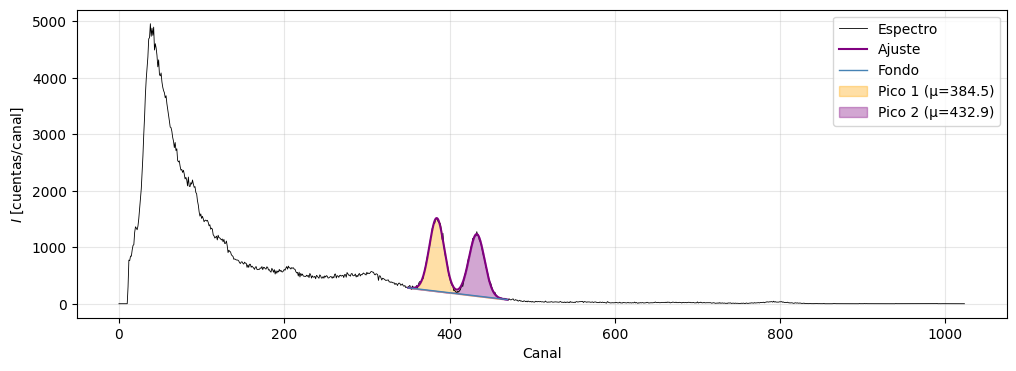

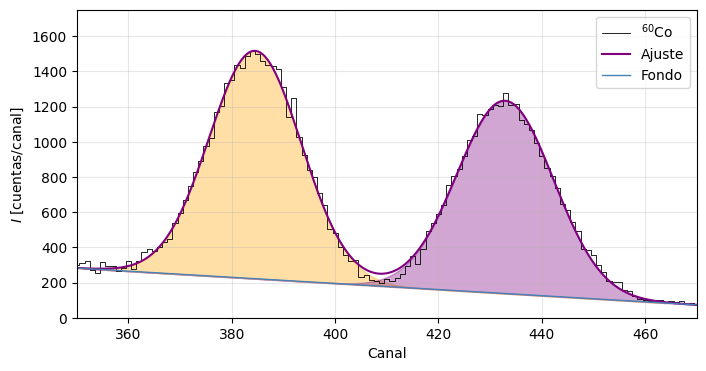

In [137]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gaussian(x, A, mu, sigma):
    return A * np.exp(- (mu - x)**2 / (2 * sigma**2))

def two_gauss_linbg(x, A1, mu1, sigma1, A2, mu2, sigma2, m, b):
    return gaussian(x, A1, mu1, sigma1) + gaussian(x, A2, mu2, sigma2) + m*x + b

def fwhm_from_sigma(sigma):
    return 2.355 * sigma

def format_unc(value, error):
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    # manejo de signo y escala
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_60Co_600s.dat"
data = leer_dat(archivo) if archivo.endswith(".dat") else pd.read_csv(archivo)
x = data.iloc[:,0].values
y = data.iloc[:,1].values

# Región de los dos picos
x_min, x_max = 350, 470
mask = (x >= x_min) & (x <= x_max)
x_region, y_region = x[mask], y[mask]

# Estimaciones iniciales, luego el ajuste las acomoda
peaks, _ = find_peaks(y_region, height=np.max(y_region)*0.2, distance=50)
if len(peaks) >= 2:
    peaks_sorted = peaks[np.argsort(y_region[peaks])][::-1][:2]
    mu1_guess, mu2_guess = x_region[peaks_sorted[0]], x_region[peaks_sorted[1]]
else:
    idx_sorted = np.argsort(y_region)[::-1]
    mu1_guess, mu2_guess = x_region[idx_sorted[0]], x_region[idx_sorted[1]]

A1_guess = y_region.max()
A2_guess = y_region.max() * 0.8
sigma1_guess, sigma2_guess = 50.0, 50.0
a0_guess, a1_guess = 0.0, np.median(y_region)

p0 = [A1_guess, mu1_guess, sigma1_guess,
      A2_guess, mu2_guess, sigma2_guess,
      a0_guess, a1_guess]

# límites (ajusta si es necesario)
minA, maxA = 0, np.max(y)*2
minSigma, maxSigma = 1e-1, 500
bounds_lower = [0, x_region.min(), minSigma, 0, x_region.min(), minSigma, -np.inf, -np.inf]
bounds_upper = [maxA, x_region.max(), maxSigma, maxA, x_region.max(), maxSigma, np.inf, np.inf]


popt, pcov = curve_fit(two_gauss_linbg, x_region, y_region, p0=p0,
                       bounds=(bounds_lower, bounds_upper), maxfev=20000)
(A1, mu1, sigma1, A2, mu2, sigma2, a0, a1) = popt
perr = np.sqrt(np.diag(pcov))


# cálculo de intensidades y propagación
c = np.sqrt(2*np.pi)   # I = A * sigma * sqrt(2*pi)

I1 = A1 * sigma1 * c
I2 = A2 * sigma2 * c

# varianzas y covarianzas extraídas de pcov (índices corresponden a popt)
varA1 = pcov[0,0]
varsig1 = pcov[2,2]
covA1sig1 = pcov[0,2]

varA2 = pcov[3,3]
varsig2 = pcov[5,5]
covA2sig2 = pcov[3,5]

# Var(I) = (dI/dA)^2 Var(A) + (dI/dσ)^2 Var(σ) + 2(dI/dA)(dI/dσ) Cov(A,σ)
# dI/dA = σ c,   dI/dσ = A c
varI1 = (sigma1*c)**2 * varA1 + (A1*c)**2 * varsig1 + 2*(sigma1*c)*(A1*c)*covA1sig1
varI2 = (sigma2*c)**2 * varA2 + (A2*c)**2 * varsig2 + 2*(sigma2*c)*(A2*c)*covA2sig2

dI1 = np.sqrt(varI1) if varI1 > 0 else np.nan
dI2 = np.sqrt(varI2) if varI2 > 0 else np.nan

# FWHM e incertidumbres (FWHM depende sólo de sigma, como definí la función al inicio)
FWHM1 = fwhm_from_sigma(sigma1)
FWHM2 = fwhm_from_sigma(sigma2)
dFWHM1 = fwhm_from_sigma(perr[2])
dFWHM2 = fwhm_from_sigma(perr[5])


print("\nResultados del ajuste (dos gaussianas + fondo lineal):\n")

print(f"μ1  = {format_unc(mu1, perr[1])} canales")
print(f"σ1  = {format_unc(sigma1, perr[2])} canales")
print(f"FWHM1 = {format_unc(FWHM1, dFWHM1)} canales")
print(f"A1  = {format_unc(A1, perr[0])} cuentas/canal (altura)")
print(f"I1  = {format_unc(I1, dI1)} canal·cuentas")

print("\n---\n")
print(f"μ2  = {format_unc(mu2, perr[4])} canales")
print(f"σ2  = {format_unc(sigma2, perr[5])} canales")
print(f"FWHM2 = {format_unc(FWHM2, dFWHM2)} canales")
print(f"A2  = {format_unc(A2, perr[3])} cuentas/canal (altura)")
print(f"I2  = {format_unc(I2, dI2)} canal·cuentas")

# Intensidad total y propagación (se asume I1 e I2 independientes; si no, habría que usar cov(I1,I2))
I_total = I1 + I2
dI_total = np.sqrt( (dI1 if not np.isnan(dI1) else 0)**2 + (dI2 if not np.isnan(dI2) else 0)**2 )

print("\n---\n")
print(f"I_total = {format_unc(I_total, dI_total)} canal·cuentas")


xfine = np.linspace(x_region.min(), x_region.max(), 2000)
total_fit = two_gauss_linbg(xfine, *popt)
g1 = gaussian(xfine, A1, mu1, sigma1)
g2 = gaussian(xfine, A2, mu2, sigma2)
bg = a0*xfine + a1

plt.figure(figsize=(12,4))
plt.plot(x, y, color='black', lw=0.6, label="Espectro")
plt.plot(xfine, total_fit, color='purple', lw=1.5, label="Ajuste")
plt.plot(xfine, bg, color='steelblue', lw=1, label="Fondo")
plt.fill_between(xfine, bg, g1+bg, where=(g1+bg > bg), color='orange', alpha=0.35, label=f"Pico 1 (μ={mu1:.1f})")
plt.fill_between(xfine, bg, g2+bg, where=(g2+bg > bg), color='purple', alpha=0.35, label=f"Pico 2 (μ={mu2:.1f})")
plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure(figsize=(8,4))
plt.step(x, y, where='mid', color='black', lw=0.6, label="$^{60}$Co")
plt.plot(xfine, total_fit, color='purple', lw=1.5, label="Ajuste")
plt.plot(xfine, bg, color='steelblue', lw=1, label="Fondo")
plt.fill_between(xfine, bg, g1+bg, where=(g1+bg > bg), color='orange', alpha=0.35)
plt.fill_between(xfine, bg, g2+bg, where=(g2+bg > bg), color='purple', alpha=0.35)
plt.xlim(x_min, x_max); plt.ylim(0, 1750)
plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.show()


Ajuste del Cobalto-57

Primero, un intento con dos gaussianas


=== Parámetros primer pico (doble gaussiana) ===
μ₁       = 54.0(11)
σ₁       = 10.0(12)
FWHM₁    = 23.5(29)
A₁       = 2298(27)
Int₁     = 57599(98)
μ₂       = 58.97(25)
σ₂       = 2.15(27)
FWHM₂    = 5.05(63)
A₂       = 3717(41)
Int₂     = 20062(33)
I = 29260(56)


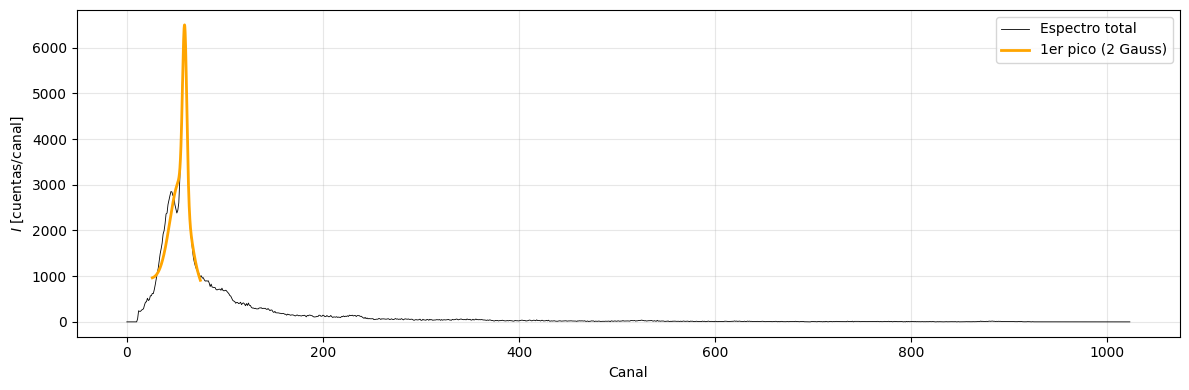

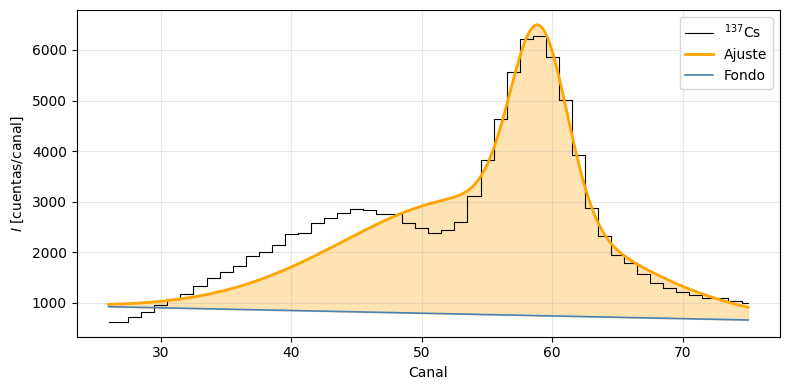

In [182]:
def leer_dat(archivo):                                                                  # lectura de datos
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gauss_bg(x, mu, sigma, A, a0, a1):                                                   # ajuste gaussiano con fondo lineal
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + a0 + a1 * x

def double_gauss_bg(x, mu1, sigma1, A1, mu2, sigma2, A2, a0, a1):                        # ajuste de dos gaussianas con fondo lineal
    return (A1 * np.exp(-0.5 * ((x - mu1) / sigma1)**2) +
            A2 * np.exp(-0.5 * ((x - mu2) / sigma2)**2) +
            a0 + a1 * x)


def fwhm(sigma): return 2.3458 * sigma                                                             # FWHM
def dfwhm(dsigma): return 2.3458 * dsigma                                                          # incertidumbre del FWHM
def intensidad(A, sigma): return A * sigma * np.sqrt(2 * np.pi)                                   # I
def dintensidad(A, sigma, dA, dsigma):                                                            # incertidumbre de I
    return np.sqrt((sigma * np.sqrt(2*np.pi) * dA)**2 + (A * np.sqrt(2*np.pi) * dsigma)**2)



def format_unc(value, error):                                                                     # incertidumbre en forma compacta
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_57Co_300s.dat"
data = leer_dat(archivo)
x = data['canal'].values
y = data['cuentas'].values

# Picos                                                                         # estimación "a ojo" de los picos
x_min1, x_max1 = 26, 75
mask1 = (x >= x_min1) & (x <= x_max1)
x_region1, y_region1 = x[mask1], y[mask1]

# estimaciones iniciales que luego se van a ajustar
mu1_guess = x_region1[np.argmax(y_region1)]
A1_guess = y_region1.max()
sigma1_guess = 4
a0_guess = np.median(y_region1)
a1_guess = 0.0

# estimaciones doble gaussiana
mu1a_guess = mu1_guess - 4.0     # desplazamiento a la izquierda ~4 canales
mu1b_guess = mu1_guess + 3.5     # desplazamiento a la derecha ~3.5 canales
sigma1a_guess = 2.5
sigma1b_guess = 2.5
A1a_guess = A1_guess * 0.6       # primer pico algo más fuerte
A1b_guess = A1_guess * 0.4       # segundo pico algo más débil

p0_1double = [
    mu1a_guess, sigma1a_guess, A1a_guess,
    mu1b_guess, sigma1b_guess, A1b_guess,
    a0_guess, a1_guess
]

lower = [mu1_guess-5, 0.5, 0.0, mu1_guess-5, 0.5, 0.0, a0_guess - A1_guess, -abs(A1_guess)/50]
upper = [mu1_guess+5, 10.0, A1_guess*2, mu1_guess+5, 10.0, A1_guess*2, a0_guess + A1_guess, abs(A1_guess)/50]

y_err = np.sqrt(np.maximum(y_region1, 1))
popt1_double, pcov1_double = curve_fit(
    double_gauss_bg, x_region1, y_region1, p0=p0_1double,
    sigma=y_err, bounds=(lower, upper), maxfev=20000
)
perr1_double = np.sqrt(np.diag(pcov1_double))


# Tablas
μ1, σ1, A1, μ2, σ2, A2, a0, a1 = popt1_double
dμ1, dσ1, dA1, dμ2, dσ2, dA2, da0, da1 = perr1_double

# Compacta
print("\n=== Parámetros primer pico (doble gaussiana) ===")
labels1 = ["μ₁", "σ₁", "FWHM₁", "A₁", "Int₁", "μ₂", "σ₂", "FWHM₂", "A₂", "Int₂"]
values1 = [μ1, σ1, fwhm(σ1), A1, intensidad(A1, σ1), μ2, σ2, fwhm(σ2), A2, intensidad(A2, σ2)]
errors1 = [dμ1, dσ1, dfwhm(dσ1), dA1, dintensidad(A1, σ1, dA1, dσ1),
           dμ2, dσ2, dfwhm(dσ2), dA2, dintensidad(A2, σ2, dA2, dσ2)]

for lbl, val, err in zip(labels1, values1, errors1):
    print(f"{lbl:8s} = {format_unc(val, err)}")

''' Intensidad total'''

# valores resultantes del ajuste
I1, dI1 = 3931, 28
I2, dI2 = 25329, 48

I = I1 + I2

# propagación de incertidumbres (variables independientes)
dI = np.sqrt(dI1**2 + dI2**2)

def compact(value, error):
    err = int(round(error))
    return f"{int(round(value))}({err})"

print("I =", compact(I, dI))

# Gráficas
xf1 = np.linspace(x_region1.min(), x_region1.max(), 800)
fit1_double = double_gauss_bg(xf1, *popt1_double)
bg1 = popt1_double[6] + popt1_double[7] * xf1

plt.figure(figsize=(12, 4))
plt.plot(x, y, color='black', lw=0.6, label='Espectro total')
plt.plot(xf1, fit1_double, color='orange', lw=2, label='1er pico (2 Gauss)')
plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# Para ver mejor cada pico por separado
for (xr, yr, xf, fit, bg, color, title) in [
    (x_region1, y_region1, xf1, fit1_double, bg1, "orange", "Primer pico ($^{137}$Cs)"),
    ]:
    plt.figure(figsize=(8, 4))
    plt.step(xr, yr, where='mid', color='black', lw=0.8, label='$^{137}$Cs')
    plt.plot(xf, fit, color=color, lw=2, label='Ajuste')
    plt.plot(xf, bg, color='steelblue', lw=1.2, label='Fondo')
    plt.fill_between(xf, bg, fit, where=(fit > bg), color=color, alpha=0.3)
    plt.xlabel("Canal"); plt.ylabel("$I$ [cuentas/canal]"); plt.legend(); plt.grid(alpha=0.3)
    plt.tight_layout(); plt.show()


Con dos gaussianas no se ajusta bien, probemos con tres


=== Parámetros primer pico (triple gaussiana) ===
μ₁       = 49.0(13)
σ₁       = 10.0(17)
FWHM₁    = 23.5(39)
A₁       = 2069(17)
Int₁     = 51869(95)
μ₂       = 58.81(55)
σ₂       = 2.34(38)
FWHM₂    = 5.48(89)
A₂       = 4168(21)
Int₂     = 24415(13)
μ₃       = 63(14)
σ₃       = 3.3(64)
FWHM₃    = 8(15)
A₃       = 460(11)
Int₃     = 3846(12)

Intensidad total I = 80130(19896)


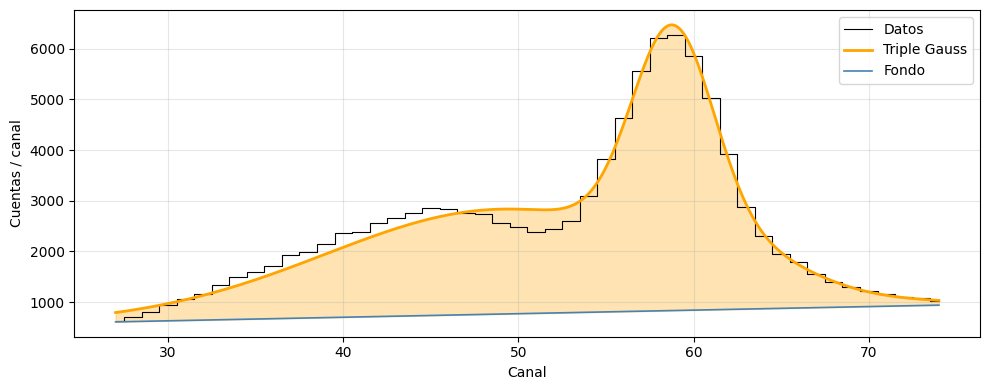

In [197]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gauss(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

def triple_gauss_bg(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, a0, a1):            # suma de tres gaussianas, pues con dos no fue suficiente
    return (gauss(x, mu1, sigma1, A1) +
            gauss(x, mu2, sigma2, A2) +
            gauss(x, mu3, sigma3, A3) +
            a0 + a1 * x)

def fwhm(sigma): return 2.3458 * sigma
def dfwhm(dsigma): return 2.3458 * dsigma
def intensidad(A, sigma): return A * sigma * np.sqrt(2 * np.pi)
def dintensidad(A, sigma, dA, dsigma):
    return np.sqrt((sigma * np.sqrt(2*np.pi) * dA)**2 + (A * np.sqrt(2*np.pi) * dsigma)**2)

def format_unc(value, error):
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_57Co_300s.dat"
data = leer_dat(archivo)
x = data['canal'].values
y = data['cuentas'].values

# === Selección de región ===
x_min1, x_max1 = 27, 74
mask1 = (x >= x_min1) & (x <= x_max1)
x_region1, y_region1 = x[mask1], y[mask1]

# Estimaciones iniciales que se van a ajustar
mu1_guess = x_region1[np.argmax(y_region1)]
A1_guess = y_region1.max()

mu1a_guess = mu1_guess - 4.5
mu1b_guess = mu1_guess
mu1c_guess = mu1_guess + 4.5

sigma1a_guess = sigma1b_guess = sigma1c_guess = 2.5

A1a_guess = A1_guess * 0.4
A1b_guess = A1_guess * 0.5
A1c_guess = A1_guess * 0.3

a0_guess = np.median(y_region1)
a1_guess = 0.0

p0_1triple = [
    mu1a_guess, sigma1a_guess, A1a_guess,
    mu1b_guess, sigma1b_guess, A1b_guess,
    mu1c_guess, sigma1c_guess, A1c_guess,
    a0_guess, a1_guess
]

lower = [mu1_guess - 10, 0.5, 0, mu1_guess - 5, 0.5, 0, mu1_guess - 1, 0.5, 0,
         a0_guess - A1_guess, -abs(A1_guess)/50]
upper = [mu1_guess + 1, 10, A1_guess*2, mu1_guess + 5, 10, A1_guess*2, mu1_guess + 10, 10, A1_guess*2,
         a0_guess + A1_guess, abs(A1_guess)/50]

# === Ajuste ===
y_err = np.sqrt(np.maximum(y_region1, 1))
popt1_triple, pcov1_triple = curve_fit(
    triple_gauss_bg, x_region1, y_region1, p0=p0_1triple,
    sigma=y_err, bounds=(lower, upper), maxfev=30000
)
perr1_triple = np.sqrt(np.diag(pcov1_triple))

# === Resultados ===
μ1, σ1, A1, μ2, σ2, A2, μ3, σ3, A3, a0, a1 = popt1_triple
dμ1, dσ1, dA1, dμ2, dσ2, dA2, dμ3, dσ3, dA3, da0, da1 = perr1_triple

labels = ["μ₁", "σ₁", "FWHM₁", "A₁", "Int₁",
          "μ₂", "σ₂", "FWHM₂", "A₂", "Int₂",
          "μ₃", "σ₃", "FWHM₃", "A₃", "Int₃"]
values = [μ1, σ1, fwhm(σ1), A1, intensidad(A1, σ1),
          μ2, σ2, fwhm(σ2), A2, intensidad(A2, σ2),
          μ3, σ3, fwhm(σ3), A3, intensidad(A3, σ3)]
errors = [dμ1, dσ1, dfwhm(dσ1), dA1, dintensidad(A1, σ1, dA1, dσ1),
          dμ2, dσ2, dfwhm(dσ2), dA2, dintensidad(A2, σ2, dA2, dσ2),
          dμ3, dσ3, dfwhm(dσ3), dA3, dintensidad(A3, σ3, dA3, dσ3)]

print("\n=== Parámetros primer pico (triple gaussiana) ===")
for lbl, val, err in zip(labels, values, errors):
    print(f"{lbl:8s} = {format_unc(val, err)}")

# === Intensidad total y su incertidumbre ===
I1, dI1 = intensidad(A1, σ1), dintensidad(A1, σ1, dA1, dσ1)
I2, dI2 = intensidad(A2, σ2), dintensidad(A2, σ2, dA2, dσ2)
I3, dI3 = intensidad(A3, σ3), dintensidad(A3, σ3, dA3, dσ3)

I_total = I1 + I2 + I3
dI_total = np.sqrt(dI1**2 + dI2**2 + dI3**2)

def compact(value, error):
    err = int(round(error))
    return f"{int(round(value))}({err})"

print(f"\nIntensidad total I = {compact(I_total, dI_total)}")

# === Gráficas ===
xf1 = np.linspace(x_region1.min(), x_region1.max(), 800)
fit1_triple = triple_gauss_bg(xf1, *popt1_triple)
bg1 = popt1_triple[-2] + popt1_triple[-1] * xf1

plt.figure(figsize=(10,4))
plt.step(x_region1, y_region1, where='mid', color='black', lw=0.8, label='Datos')
plt.plot(xf1, fit1_triple, color='orange', lw=2, label='Triple Gauss')
plt.plot(xf1, bg1, color='steelblue', lw=1.2, label='Fondo')
plt.fill_between(xf1, bg1, fit1_triple, where=(fit1_triple > bg1), color='orange', alpha=0.3)
plt.xlabel("Canal"); plt.ylabel("Cuentas / canal")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


/tmp/ipython-input-2935508330.py:76: PeakPropertyWarning: some peaks have a prominence of 0
  results_half = peak_widths(y_region1, peaks, rel_height=0.5)
/tmp/ipython-input-2935508330.py:76: PeakPropertyWarning: some peaks have a width of 0
  results_half = peak_widths(y_region1, peaks, rel_height=0.5)



=== Parámetros (triple gaussiana) ===
μ₁       = 38.2(14)
σ₁       = 2.6(12)
FWHM₁    = 6.2(29)
A₁       = 466(39)
Int₁     = 3062(29)
μ₂       = 46.00(93)
σ₂       = 4.6(11)
FWHM₂    = 10.8(25)
A₂       = 1620(86)
Int₂     = 18649(44)
μ₃       = 58.71(11)
σ₃       = 3.07(10)
FWHM₃    = 7.22(24)
A₃       = 4923(12)
Int₃     = 37845(16)

Intensidad total I = 59556(5516)


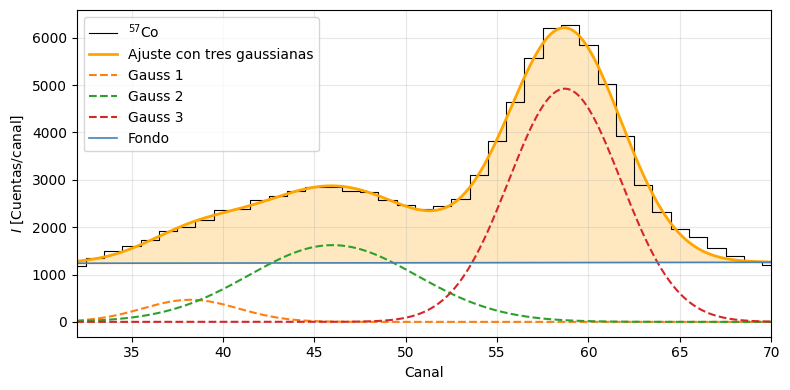

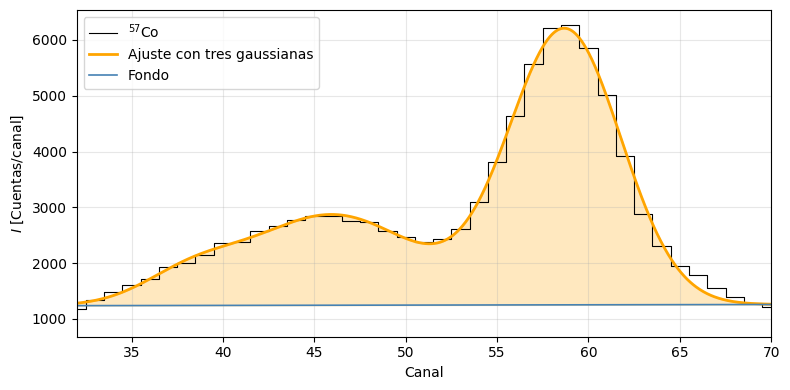

In [233]:
from scipy.signal import find_peaks, peak_widths

def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

def gauss(x, mu, sigma, A):                                                               # gaussiana normal
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

def triple_gauss_bg(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, a0, a1):        # suma de tres gaussianas
    return (gauss(x, mu1, sigma1, A1) +
            gauss(x, mu2, sigma2, A2) +
            gauss(x, mu3, sigma3, A3) +
            a0 + a1 * x)

def fwhm(sigma):                                                                              # FWHM
  return 2.355 * sigma
def intensidad(A, sigma):                                                                     # I
  return A * sigma * np.sqrt(2 * np.pi)
def dintensidad(A, sigma, dA, dsigma):                                                        # Incertidumbre de I
    return np.sqrt((sigma * np.sqrt(2*np.pi) * dA)**2 + (A * np.sqrt(2*np.pi) * dsigma)**2)

def format_unc(value, error):
    if error == 0 or np.isnan(error):
        return f"{value:.4g}"
    exp_err = int(np.floor(np.log10(abs(error))))
    digits = max(0, -exp_err + 1)
    value_rounded = round(value, digits)
    err_rounded = int(round(error * 10**(-exp_err + 1)))
    if digits > 0:
        return f"{value_rounded:.{digits}f}({err_rounded})"
    else:
        return f"{int(round(value_rounded))}({err_rounded})"


archivo = "NaI_57Co_300s.dat"
data = leer_dat(archivo)
x = data['canal'].values
y = data['cuentas'].values

# región de los picos
x_min1, x_max1 = 30, 70
mask1 = (x >= x_min1) & (x <= x_max1)
x_region1 = x[mask1]
y_region1 = y[mask1]


# detectar los picos
peaks, props = find_peaks(y_region1, prominence=(None, None), distance=3)
# tomamos los tres picos más prominentes
if len(peaks) > 3:
    prominences = props.get('prominences', None)
    if prominences is None:
        from scipy.signal import peak_prominences
        prominences = peak_prominences(y_region1, peaks)[0]
    order = np.argsort(prominences)[-3:]
    peaks = peaks[order]
# ordeno por posición en x
peaks = np.sort(peaks)

# si encuentro menos de 3 picos, genero un guess alrededor del pico principal
if len(peaks) == 0:
    main_idx = np.argmax(y_region1)
    peaks = np.array([main_idx])
if len(peaks) == 1:
    main = peaks[0]
    peaks = np.array([max(0, main-6), main, min(len(x_region1)-1, main+6)])
elif len(peaks) == 2:
    peaks = np.sort(np.concatenate([peaks, [int(np.round(np.mean(peaks)))] ]))    # inserto un pico intermedio

# estimaciones iniciales
results_half = peak_widths(y_region1, peaks, rel_height=0.5)
widths = results_half[0]
# aproximo la anchura del pico a sigma para hacer la estimación
sig_guesses = np.maximum(1.0, widths / 2.355)

# convierto los índices a valores de canales
mu_guesses = x_region1[peaks]
A_guesses = y_region1[peaks] - np.median(y_region1)                               # altura sobre fondo aproximado
A_guesses = np.maximum(A_guesses, 0.2 * np.max(y_region1))                        # evitar ceros muy pequeños

A_guesses = np.minimum(A_guesses, 1.5 * np.max(y_region1))                        # si alguna amplitud se ve excesiva, la limito


# p0 en orden: mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, a0, a1
mu1_guess, mu2_guess, mu3_guess = mu_guesses.tolist()
sigma1_guess, sigma2_guess, sigma3_guess = sig_guesses.tolist()
A1_guess, A2_guess, A3_guess = A_guesses.tolist()

a0_guess = np.median(y_region1)
a1_guess = 0.0

p0_1triple = [
    mu1_guess, sigma1_guess, A1_guess,
    mu2_guess, sigma2_guess, A2_guess,
    mu3_guess, sigma3_guess, A3_guess,
    a0_guess, a1_guess
]

maxA = max(A1_guess, A2_guess, A3_guess) * 3                                    # doy flexibilidad en los bounds
lower = [
    mu1_guess - 8, 0.5, 0.0,
    mu2_guess - 6, 0.5, 0.0,
    mu3_guess - 8, 0.5, 0.0,
    a0_guess - 0.5*np.abs(a0_guess), -abs(maxA)/20
]
upper = [
    mu1_guess + 8, 15.0, maxA,
    mu2_guess + 6, 15.0, maxA,
    mu3_guess + 8, 15.0, maxA,
    a0_guess + 0.5*np.abs(a0_guess), abs(maxA)/20
]

# === Mostrar guesses calculados (útil para depurar) ===
# print("Guesses calculados:")
# print("mu:", mu1_guess, mu2_guess, mu3_guess)
# print("sigma:", sigma1_guess, sigma2_guess, sigma3_guess)
# print("A:", A1_guess, A2_guess, A3_guess)
# print("p0:", p0_1triple)
# print("bounds lower:", lower)
# print("bounds upper:", upper)

# Ajuste de triple gaussiana
y_err = np.sqrt(np.maximum(y_region1, 1.0))
popt1_triple, pcov1_triple = curve_fit(
    triple_gauss_bg, x_region1, y_region1, p0=p0_1triple,
    sigma=y_err, bounds=(lower, upper), maxfev=60000
)
perr1_triple = np.sqrt(np.diag(pcov1_triple))

# Tabla de resultados
μ1, σ1, A1, μ2, σ2, A2, μ3, σ3, A3, a0, a1 = popt1_triple
dμ1, dσ1, dA1, dμ2, dσ2, dA2, dμ3, dσ3, dA3, da0, da1 = perr1_triple

labels = ["μ₁", "σ₁", "FWHM₁", "A₁", "Int₁",
          "μ₂", "σ₂", "FWHM₂", "A₂", "Int₂",
          "μ₃", "σ₃", "FWHM₃", "A₃", "Int₃"]
values = [μ1, σ1, fwhm(σ1), A1, intensidad(A1, σ1),
          μ2, σ2, fwhm(σ2), A2, intensidad(A2, σ2),
          μ3, σ3, fwhm(σ3), A3, intensidad(A3, σ3)]
errors = [dμ1, dσ1, dfwhm(dσ1), dA1, dintensidad(A1, σ1, dA1, dσ1),
          dμ2, dσ2, dfwhm(dσ2), dA2, dintensidad(A2, σ2, dA2, dσ2),
          dμ3, dσ3, dfwhm(dσ3), dA3, dintensidad(A3, σ3, dA3, dσ3)]

print("\n=== Parámetros (triple gaussiana) ===")
for lbl, val, err in zip(labels, values, errors):
    print(f"{lbl:8s} = {format_unc(val, err)}")

# === Intensidad total y su incertidumbre ===
I1, dI1 = intensidad(A1, σ1), dintensidad(A1, σ1, dA1, dσ1)
I2, dI2 = intensidad(A2, σ2), dintensidad(A2, σ2, dA2, dσ2)
I3, dI3 = intensidad(A3, σ3), dintensidad(A3, σ3, dA3, dσ3)

I_total = I1 + I2 + I3
dI_total = np.sqrt(dI1**2 + dI2**2 + dI3**2)

def compact(value, error):
    err = int(round(error))
    return f"{int(round(value))}({err})"

print(f"\nIntensidad total I = {compact(I_total, dI_total)}")

# Gráfica total
xf1 = np.linspace(x_region1.min(), x_region1.max(), 1200)
fit1_triple = triple_gauss_bg(xf1, *popt1_triple)
bg1 = a0 + a1 * xf1

comp1 = gauss(xf1, μ1, σ1, A1)
comp2 = gauss(xf1, μ2, σ2, A2)
comp3 = gauss(xf1, μ3, σ3, A3)

plt.figure(figsize=(8,4))
plt.step(x_region1, y_region1, where='mid', color='black', lw=0.8, label='$^{57}$Co')
plt.plot(xf1, fit1_triple, color='orange', lw=2, label='Ajuste con tres gaussianas')
plt.plot(xf1, comp1, '--', lw=1.5, color='C1', label='Gauss 1')
plt.plot(xf1, comp2, '--', lw=1.5, color='C2', label='Gauss 2')
plt.plot(xf1, comp3, '--', lw=1.5, color='C3', label='Gauss 3')
plt.plot(xf1, bg1, color='steelblue', lw=1.2, label='Fondo')
plt.fill_between(xf1, bg1, fit1_triple, where=(fit1_triple > bg1), color='orange', alpha=0.25)
plt.xlim(32,70)
plt.xlabel("Canal"); plt.ylabel("$I$ [Cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.step(x_region1, y_region1, where='mid', color='black', lw=0.8, label='$^{57}$Co')
plt.plot(xf1, fit1_triple, color='orange', lw=2, label='Ajuste con tres gaussianas')
plt.plot(xf1, bg1, color='steelblue', lw=1.2, label='Fondo')
plt.fill_between(xf1, bg1, fit1_triple, where=(fit1_triple > bg1), color='orange', alpha=0.25)
plt.xlim(32,70)
plt.xlabel("Canal"); plt.ylabel("$I$ [Cuentas/canal]")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()
